In [14]:
import scipy.constants as cst
import numpy as np
import matplotlib.pyplot as plt
import Functions
import pandas as pd 
import isa
from scipy.signal import find_peaks
CO2 = Functions.gas('./Absorbtion Continua up to 5000cm^-1/CO2.csv',44,415.16 )
CH4 = Functions.gas('./Absorbtion Continua up to 5000cm^-1/CH4.csv',16,1.8505 )
H2O = Functions.gas('./Absorbtion Continua up to 5000cm^-1/H2O.csv',18,2500)
O3 = Functions.gas('./Absorbtion Continua/O3.csv',48,0.08 )

The main function, that this package serves is to provide code that takes the line by line cross sections provided by the HITRAN database, and calculate light absorption through the gases. 

To load the Line by line spectra from the HITRAN database a new file type should be made, with the following properties: 
Line Endings:  Unix / Linux / Mac OS X (LF)
Field separator: [comma]

The Parameters in the output should be:  \
Molecule ID  \
$\nu$   \
S  \
$\gamma_{air}$  \
$n_{air}$  \
$\gamma_{self}$  

For all of the data on the Github, a wavenumber range of $ 0 < \nu < 5000 cm^{-1}$ was used and only the most common isotopologue was chosen.





To download the data go to https://hitran.org/lbl/.  \
Choose a molecue and a wavenumber range  \
Create an output format as above  \
Download the file  \
(Rename the file to 'gas'.csv e.g CO2.csv)


The Hitran file can be loaded as follows:  \

                gas = Functions.gas(path,mr,ppm)
path: path to file  \
mr: relative atomic mass(g/mol)  \
ppm: parts per million

In [17]:
H2O = Functions.gas('./Absorbtion Continua up to 5000cm^-1/H2O.csv',18,2500)

### Gas Class 
the gas class has the following attributes:

            self.nu  1d Dataframe of nu
            self.nu_unit  '$cm^-1$'
            self.absorbtion_coeff  1d Dataframe of absoption coefficient 
            self.absorbtion_coeff_unit  cm^-1/(molecule cm^-1)
            self.mr  mr
            self.mr_unit  g/mol
            self.data 2d dataframe, with columns of nu, absorption coefficient, Gamma air, N air, Gamma Self 
            self.gamma_air  1d Dataframe of gamma air 
            self.gamma_self  1d Dataframe og gamma self 
            self.n_air  1d Dataframe of N_air 
            self.ppm  Parts per million        
            self.pv  Fractional content per volume 
The main part for plotting absoption spectra is: 
        Tau_for_whole_atmosphere(self,alt_1, alt_2,steps = 10)
This function implements the pressure and temperature dependence of the molecular absorption spectra.

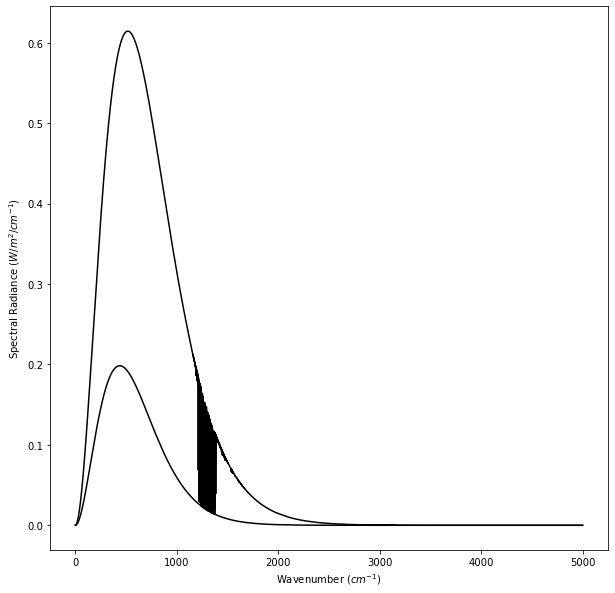

In [19]:
gas  = CH4
## Temperatures at surface and 10km up
T_a = isa.getTemperature(0)
T_b = isa.getTemperature(10000)


tau = CH4.Tau_for_whole_atmosphere(0,10000)

p_int = Functions.plank_nu(gas.nu,T_b,Flux= True)
I_surf= Functions.plank_nu(gas.nu,T_a,Flux = True)
I_strat_no_gas = Functions.plank_nu(gas.nu,T_b,Flux = True)

I_strat =  np.exp(-tau)*I_surf + p_int


###Plotting 
fig = plt.figure(figsize=(10,10))
plt.plot(gas.nu,I_strat,c = 'black')
plt.plot(gas.nu,I_strat_no_gas, c = "black")
plt.xlabel('Wavenumber $(cm^{-1})$')
plt.ylabel('Spectral Radiance $(W/m^2/cm^{-1})$')
fig.savefig('./Figures/co2.png',dpi = 300)

## Multigas Tutorial 
The multigas function, implements the transmission equation for multiple gases.  \
 This function takes a list of gas objects, a start altitude and an end altitude, and outputs 3 lists:  \
 Outgoing Flux 
 Wavenumber 
 Incoming Flux
 these 3 lists have 1d DataFrames corresponding to each gas for each of these quantities, ie the below example outputs 9 DataFrames. 

 Note: 
 This implementation is a good start however, the line by line cross sections for each gas could be combined into one total $\kappa(\nu,p,T)$, This would be a more accurate description of the actual phenomena, as currently the gases are treated as independent. 

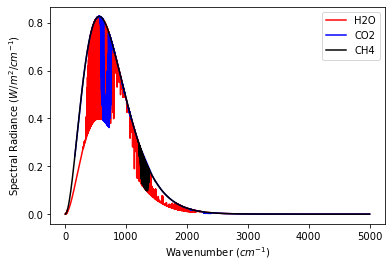

In [20]:
gases = [H2O,CO2,CH4]
### Use of Multigas method 
flux , nu ,inc = Functions.multigas(gases,0,1000)
### Plotting 
colors = ["red",'blue', 'black']
gn = ['H2O','CO2','CH4']
for i in range(3):
    plt.plot(nu[i],flux[i],c = colors[i], label = gn[i])
plt.xlabel('Wavenumber $(cm^{-1})$')
plt.ylabel('Spectral Radiance $(W/m^2/cm^{-1})$')

plt.legend()